<div align="center">
    <h1> Regression </h1>
</div>

In this notebook, I will implement basic regression algorithms from scratch.

## Table of Content
1. [Linear Regression](#linear-regression)
2. [Polynomial Regression](#polynomial-regression)
3. [Ridge Regression (L2 Regularization)](#ridge-regression-(l2-regularization))
4. [Lasso Regression (L1 Regularization)](#lasso-regression-(l1-regularization))
5. [Decision Tree Regression](#decision-tree-regression)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
# %matplotlib ipympl

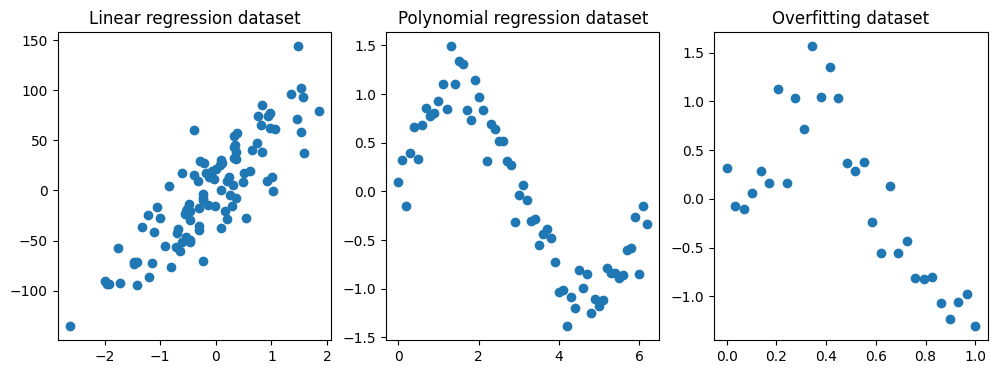

In [2]:
# Generate datasets
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=30, random_state=42)

noise = 0.2
X_poly = np.arange(0, 2*np.pi, 0.1).reshape(-1, 1)
y_poly = np.sin(X_poly) + np.random.normal(0, noise, X_poly.shape)

noise = 0.3
X_overfit = np.linspace(0, 1, 30).reshape(-1, 1)
y_overfit = np.array([np.sin(5 * x) for x in X_overfit]).reshape(-1, 1) + np.random.normal(0, noise, (30, 1))


# Plot datasets
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

ax1.scatter(X, y)
ax1.set_title('Linear regression dataset')

ax2.scatter(X_poly, y_poly)
ax2.set_title('Polynomial regression dataset')

ax3.scatter(X_overfit, y_overfit)
ax3.set_title('Overfitting dataset')

plt.show()

## Classical Linear Regression

* Least Square Method
    * We consider the linear model $y = m \cdot x + b$.
    $$ m = \frac{n \cdot \sum(xy) - \sum(x) \cdot \sum(y)}{n \cdot \sum(x^2) - (\sum(x))^2} $$
    $$ b = \frac{\sum(y) - m \cdot \sum(x)}{n} $$
    where $n$ is the number of data points.

{'slope': np.float64(49.829309347009136), 'intercept': np.float64(3.4953459615809197)}


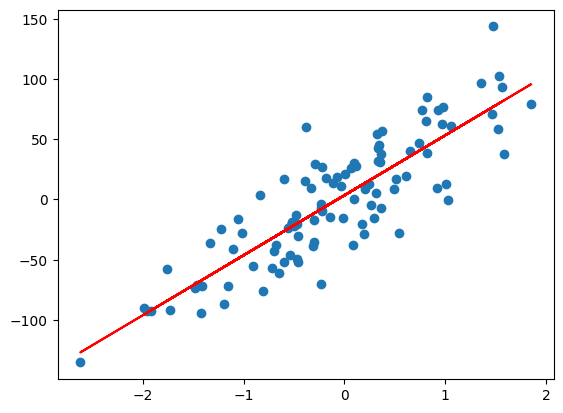

In [29]:
def least_squares(X, y):
    N = X.shape[0]
    m = N * np.sum(X.T * y) - np.sum(X) * np.sum(y)
    m /= N * np.sum(X**2) - np.sum(X)**2

    b = np.sum(y) - m * np.sum(X)
    b /= N

    return m, b

# Predict
m, b = least_squares(X, y)
print({'slope': m, 'intercept': b})

# Plot
plt.scatter(X, y)
plt.plot(X, m*X + b, color='red')
plt.show()

* Ordinary Least Square Method
    * We consider the linear model $y = X \cdot \beta + \epsilon$. Here, $X$ is the design matrix and $\beta$ is the parameter vector.
    * The objective is to minimize the sum of squared errors.
    $$ \hat{\beta} = (X^T X)^{-1} X^T y $$

Estimated beta: [49.39056071]


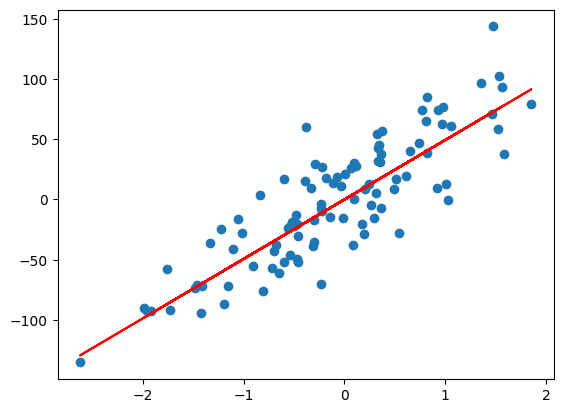

In [30]:
def ordinary_least_square(X, y):
    beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
    return beta_hat

# Predict
beta_hat = ordinary_least_square(X, y)
print(f'Estimated beta: {beta_hat}')

# Plot
plt.scatter(X, y)
plt.plot(X, X @ beta_hat, color='red')
plt.show()

## Polynomial Regression

* We consider the polynomial model $y = \beta_0 + \beta_1 \cdot x + \beta_2 \cdot x^2 + \cdots + \beta_n \cdot x^n + \epsilon$.

* To fit the model, we solve for $ \boldsymbol{\beta} $ using the **Ordinary Least Squares (OLS)** solution:
$$
\boldsymbol{\beta} = (X^T X)^{-1} X^T y
$$


numpy values : [[-0.00057364  0.00696593 -0.01729451]]
polynomial_regression values : [[-0.00057364  0.00696593 -0.01729451]]


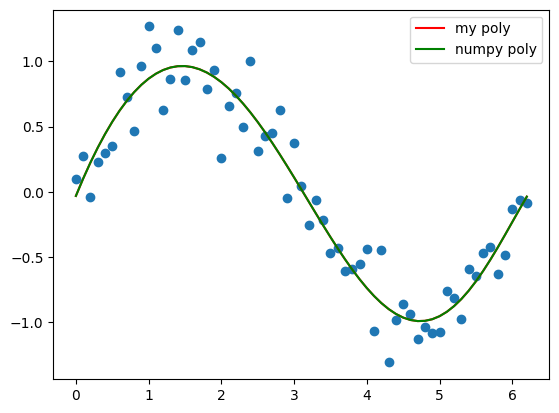

In [ ]:
def polynomial_regression(X, y, degree=1):
    X_poly = np.zeros((X.shape[0], degree + 1))
    
    for i in range(degree + 1):
        X_poly[:, i] = X[:, 0]**i     

    beta_hat = ordinary_least_square(X_poly, y)
    return beta_hat, X_poly

# Predict
degree = 6
beta_hat, X_poly_hat = polynomial_regression(X_poly, y_poly, degree)
numpy_poly = np.polyfit(X_poly[:, 0], y_poly, degree)

print(f'numpy values : {numpy_poly[:3].T}')
print(f'polynomial_regression values : {np.flip(beta_hat)[:3].T}')

# Plot
plt.scatter(X_poly, y_poly)
plt.plot(X_poly, X_poly_hat @ beta_hat, color='red', label='my poly')
plt.plot(X_poly, np.polyval(numpy_poly, X_poly[:, 0]), color='green', label='numpy poly')
plt.legend()
plt.show()

## Ridge Regression (L2 Regularization)

Ridge Regression is a *linear regression* model with a regularization term that penalizes large coefficients. The main advantage of Ridge Regression is that it reduces overfitting by shrinking the regression coefficients toward zero.

### Problem Formulation

Given a dataset $ X \in \mathbb{R}^{n \times p} $ and response variable $ y \in \mathbb{R}^{n} $, the ridge regression objective function is:

$$
\hat{\beta}_{\text{Ridge}} = \arg\min_{\beta} \|y - X\beta\|^2_2 + \lambda\|\beta\|^2_2
$$

Where $\lambda > 0$ is the regularization parameter that controls the amount of shrinkage.

Ridge regression addresses issues of multicollinearity and near-singular matrices $ X^T X $ by adding a positive constant $ \lambda I $ to the diagonal, improving the condition number. The closed-form solution is:

$$
\hat{\beta} = (X^T X + \lambda I)^{-1} X^T y
$$

As $\lambda$ increases, the bias of the ridge regression estimator increases while its variance decreases, creating a bias-variance trade-off that can lead to better predictive performance compared to ordinary least squares.

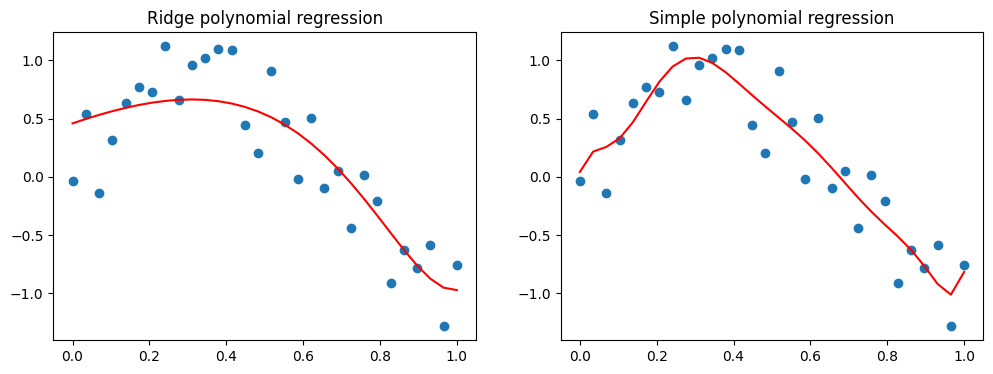

In [ ]:
def ridge_regression(X, y, alpha):
    beta_hat = np.linalg.inv(X.T @ X + alpha * np.eye(X.shape[1])) @ X.T @ y
    return beta_hat

def polynomial_ridge_regression(X, y, alpha, degree=1):
    X_poly = np.zeros((X.shape[0], degree + 1))
    
    for i in range(degree + 1):
        X_poly[:, i] = X[:, 0]**i     

    beta_hat = ridge_regression(X_poly, y, alpha)
    return beta_hat, X_poly

# Predict
degree = 10
alpha = 0.1

beta_hat, X_overfit_hat = polynomial_ridge_regression(X_overfit, y_overfit, alpha, degree)

alpha = 0
beta_hat_simple, X_overfit_hat_simple = polynomial_regression(X_overfit, y_overfit, degree)

# Plot
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.scatter(X_overfit, y_overfit)
ax1.plot(X_overfit, X_overfit_hat @ beta_hat, color='red')
ax1.set_title('Ridge polynomial regression')

ax2.scatter(X_overfit, y_overfit)
ax2.plot(X_overfit, X_overfit_hat_simple @ beta_hat_simple, color='red')
ax2.set_title('Simple polynomial regression')

plt.show()

## Lasso Regression (L1 Regularization)

Lasso regression is a linear regression method that introduces an L1 regularization term. This technique helps in feature selection by shrinking some coefficients to exactly zero, compared to Ridge regression that only shrinks them close to zero.

- Given a dataset $ X \in \mathbb{R}^{n \times p} $ and response variable $ y \in \mathbb{R}^{n} $, the Lasso regression objective function is:

$$
\beta^* = \arg\min_{\beta} \left\{ \frac{1}{2} || y - X\beta ||^2_2 + \alpha || \beta ||_1 \right\}
$$

where $ \alpha > 0 $ is the regularization parameter that controls the amount of shrinkage.

- Lasso regression is typically solved using **coordinate descent**. The update for each coefficient $ \beta_j $ is computed using the **soft-thresholding operator**:

$$
\beta_j = S_{\lambda / ||X_j||^2} \left( \frac{X_j^T (y - X_{-j} \beta_{-j})}{X_j^T X_j} \right)
$$

in order to compute $y - X_{-j} \beta_{-j}$, we can rewrite the equation as:

$$
y - X\beta = y - \sum_{k \neq j} X[:, k] \beta_k - X[:, j] \beta_j
$$

where:
- $ S_{\lambda}(x) $ is the **soft-thresholding function**, defined as:
  $$
  S_{\lambda}(x) = \begin{cases}
  0 & \text{if } |x| \leq \lambda \\
  x - \lambda & \text{if } x > \lambda \\
  x + \lambda & \text{if } x < -\lambda
  \end{cases}
  $$

### Resources
- [Soft-thresholding operator derivation](https://math.stackexchange.com/questions/471339/derivation-of-soft-thresholding-operator-proximal-operator-of-l-1-norm)
- [Coordinate Descent for Lasso](https://www.stat.cmu.edu/~ryantibs/convexopt/lectures/coord-desc.pdf)
- [Scikit-learn Lasso documentation](https://scikit-learn.org/stable/modules/linear_model.html#lasso)

Estimated betta: [49.384517]
Estimated betta: [49.21695612]


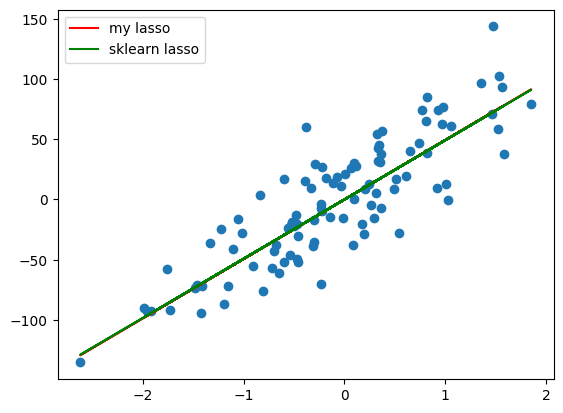

In [28]:
def soft_treshold(z, alpha):
    return np.sign(z) * np.max(np.abs(z) - alpha, 0)


def lasso_regression(X, y, alpha=0.01, max_iter=1000, epsilon=10e-6):
    beta_hat = np.zeros(X.shape[1])

    for _ in range(max_iter):
        prev_beta = beta_hat.copy()

        for j in range(X.shape[1]):

            rezidual = y - X @ beta_hat + X[:, j] * beta_hat[j]
            w = X.T @ X

            beta_hat[j] = soft_treshold(X[:, j].T @ rezidual, alpha) / w[j, j]

        if np.linalg.norm(prev_beta - beta_hat) < epsilon:
            break

    return beta_hat

alpha = 0.5

beta_hat = lasso_regression(X, y, alpha)
print(f'Estimated betta: {beta_hat}')

from sklearn.linear_model import Lasso

lasso = Lasso(alpha)

lasso.fit(X, y)
print(f'Estimated betta: {lasso.coef_}')


plt.scatter(X, y)
plt.plot(X, X @ beta_hat, color='red', label='my lasso')
plt.plot(X, X @ lasso.coef_, color='green', label='sklearn lasso')
plt.legend()
plt.show()

## Decision Tree Regression

X0 <=  0.85
   left node: X0 <= -0.77
       left node: X1 <= -1.07
           left node: -148.47
           right node: -55.98
       right node: X1 <= -0.59
          left node: -34.15
          right node:  42.16
   right node: X1 <=  0.35
      left node:  118.71
      right node:  208.18


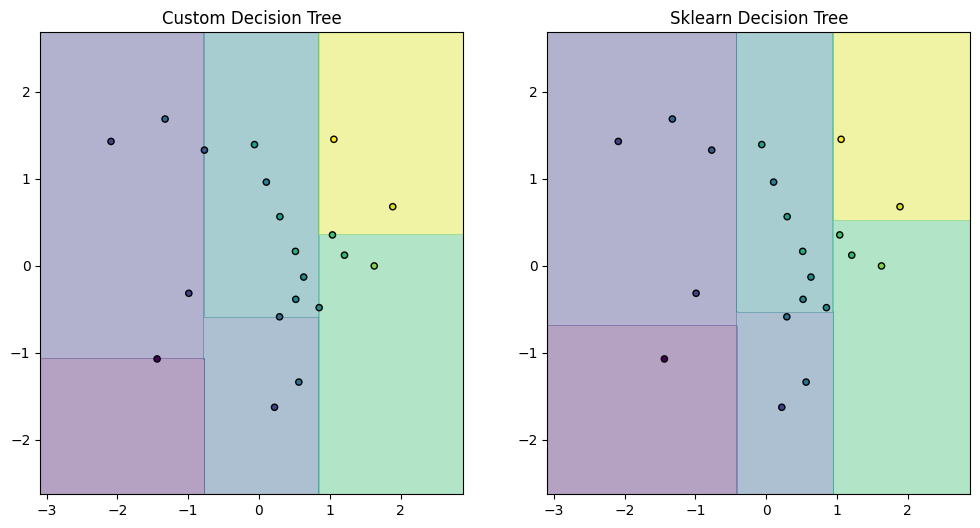

In [24]:
class Node:
    def __init__(self, threshold=None, feature_idx=None, left_node=None, right_node=None, value=None):
        self.threshold = threshold
        self.feature_idx = feature_idx
        self.left_node = left_node
        self.right_node = right_node
        self.value = value

class DecisionTreeRegression:
    def __init__(self, min_sample_size, max_depth):
        self.root = None
        self.min_sample_size = min_sample_size
        self.max_depth = max_depth

    def fit(self, X, y):
        self.root = self.build_tree(X, y, 0)

    def build_tree(self, X, y, depth):
        num_samples, num_features = X.shape

        if depth >= self.max_depth or num_samples < self.min_sample_size:
            return Node(value=np.mean(y))
        
        best_ssr, best_threshold, best_feature = self.sum_squared_residual(X, y)

        if best_ssr == np.inf:
            return Node(value=np.mean(y))

        left_X, left_y, right_X, right_y = self.split_dataset(X, y, best_threshold, best_feature)

        left_node = self.build_tree(left_X, left_y, depth + 1)
        right_node = self.build_tree(right_X, right_y, depth + 1)

        return Node(threshold=best_threshold, feature_idx=best_feature, left_node=left_node, right_node=right_node)

    def split_dataset(self, X, y, threshold, feature_idx):
        mask = X[:, feature_idx] <= threshold
        
        X_left = X[mask]
        y_left = y[mask]
        
        X_right = X[~mask]
        y_right = y[~mask]
        
        return X_left, y_left, X_right, y_right

    def mean_squared_error(self, y):
        return np.mean((y - np.mean(y))**2)
    
    def sum_squared_residual(self, X, y):
        best_ssr = np.inf
        best_threshold = None
        best_feature = None
        
        for feature_idx in range(X.shape[1]):
            feature_values = X[:, feature_idx]
            for threshold in feature_values:
                left_X, left_y, right_X, right_y = self.split_dataset(X, y, threshold, feature_idx)
                
                if len(left_y) > 0 and len(right_y) > 0:
                    ssr = (len(left_y) * self.mean_squared_error(left_y) + len(right_y) * self.mean_squared_error(right_y))
                    
                    if ssr < best_ssr:
                        best_ssr = ssr
                        best_threshold = threshold
                        best_feature = feature_idx

        return best_ssr, best_threshold, best_feature
    
    def predict(self, X):
        return np.array([self.__predict(x, self.root) for x in X])
    
    def __predict(self, x, node):
        if node.value is not None:
            return node.value
        
        if x[node.feature_idx] <= node.threshold:
            return self.__predict(x, node.left_node)
        
        return self.__predict(x, node.right_node)
    
    def print_tree_recursive(self, node, indent='   '):
        if node.value is not None:
            print(f'{node.value : .2f}')
        else:
            print(f'X{node.feature_idx} <= {node.threshold : .2f}')
            print(f'{indent}left node: ', end='')
            self.print_tree_recursive(node.left_node, indent= indent + '    ')
            print(f'{indent}right node: ', end='')
            self.print_tree_recursive(node.right_node, indent= indent + '   ')
        
# Predict
X_3d, y_3d = datasets.make_regression(n_samples=20, n_features=2, noise=30, random_state=24)
min_sample_size = 5
max_depth = 3

# Custom decision tree
tree = DecisionTreeRegression(min_sample_size, max_depth)
tree.root = tree.build_tree(X_3d, y_3d, 0)
y_pred = tree.predict(X_3d)

# Sklearn decision tree
from sklearn.tree import DecisionTreeRegressor
sk_tree = DecisionTreeRegressor(min_samples_split=min_sample_size, max_depth=max_depth)
sk_tree.fit(X_3d, y_3d)
y_pred_sk = sk_tree.predict(X_3d)

# Print custom decision tree
tree.print_tree_recursive(tree.root)

# Plot
x_min, x_max = X_3d[:, 0].min() - 1, X_3d[:, 0].max() + 1
y_min, y_max = X_3d[:, 1].min() - 1, X_3d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z_custom = tree.predict(np.c_[xx.reshape(-1, 1), yy.reshape(-1, 1)])
Z_custom = Z_custom.reshape(xx.shape)

Z_sklearn = sk_tree.predict(np.c_[xx.reshape(-1, 1), yy.reshape(-1, 1)])
Z_sklearn = Z_sklearn.reshape(xx.shape)

plt.close('all')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Custom decision tree plot
ax1.contourf(xx, yy, Z_custom, alpha=0.4)
ax1.scatter(X_3d[:, 0], X_3d[:, 1], c=y_3d, edgecolor='k', s=20)
ax1.set_title('Custom Decision Tree')

# Sklearn decision tree plot
ax2.contourf(xx, yy, Z_sklearn, alpha=0.4)
ax2.scatter(X_3d[:, 0], X_3d[:, 1], c=y_3d, edgecolor='k', s=20)
ax2.set_title('Sklearn Decision Tree')

plt.show()

## Random Forest Regression

In [25]:
pass

- Random Forest Regression
- SVM Regression
- Metrics